# BL40A2020 Wireless Communication Systems

## Assignment  week 4: Probability theory and random processes

## Author: Jesse Peltola

In [1]:
! pip install komm


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1. Follow similar steps done in the [notes](https://github.com/pedrohjn/wireless-comm/blob/master/Week%204/week4.ipynb) to analyze the *[Binary erasure channel](https://komm.readthedocs.io/en/latest/komm.BinaryErasureChannel/)* 

![](https://upload.wikimedia.org/wikipedia/commons/b/b6/Binary_erasure_channel.svg)

**(a) Consider that the probabilities related to the input sequence is the following:**
- $q$ is the probability that the input bit is $0$ 
- $1-q$ is the probability that the input bit is $1$.

**Compute analytically (as a function of $p$ and $q$):**
- Probability that the output is $e$
- Probability that the input is $0$ if the output is $e$ (error)
- Probability that the input is $1$ if the output is $e$ (error)

Pr[receive 0 | transmit 0]= 1 — p
Pr[receive e | transmit 0]= p

Pr[receive 1 | transmit 1]= 1 — p
Pr[receive e | transmit 1] = p

Pr[receive e] = Pri[receive e | transmit 1] = {1 — q) + Pr[receive e | transmit 0] * q 
$newline$ fr = (1 — q) + pq = p

Pr[recelve 0] = Pr[receive 0 | transmit 0] * q = (1-p)q
Pr[receive 1]= Pr[receive 1 | transmit 1] * (1-q) = (1-p)(1 — q)

In [2]:
import math
import komm
import sympy as sp
sp.init_printing() 
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.interpolate as interp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [10]:
input_seq_size = 1000 #sequence
tp = np.arange(0, input_seq_size, 1)
p_aux = 0 #p_aux is as q

input_seq = np.random.choice([0, 1], size= input_seq_size, p=[p_aux, 1 - p_aux])


num_zeros = (input_seq == 0).sum()
num_ones = (input_seq == 1).sum()

p = 0.1
bec = komm.BinaryErasureChannel(p)
output_seq = bec(input_seq)
output_seq_plot = np.append(input_seq,input_seq[input_seq_size-1])

num_zeros_bec = (output_seq == 0).sum()
num_ones_bec = (output_seq == 0).sum()
num_errors_bec = (output_seq == 2).sum()

print("Input: ")
print("Propability input 0:", num_zeros/input_seq_size, "Analytical: ", p_aux)
print("Propability input 1:", num_zeros/input_seq_size, "Analytical: ", 1 - p_aux)
print("Output: ")
print("Propability input 0:", num_zeros_bec/input_seq_size, "Analytical: ", p_aux * (1-p))
print("Propability input 1:", num_ones_bec/input_seq_size, "Analytical: ", (1 - p_aux) * (1-p))
print("Propability input e:", num_errors_bec/input_seq_size, "Analytical: ", p)




Input: 
Propability input 0: 0.0 Analytical:  0
Propability input 1: 0.0 Analytical:  1
Output: 
Propability input 0: 0.0 Analytical:  0.0
Propability input 1: 0.0 Analytical:  0.9
Propability input e: 0.087 Analytical:  0.1


**(b) Test the analytical results via simulation (see tutorial) considering that $p=0.1$ and $q=0.4$**

In [17]:
input_seq_size = 1000 #sequence
tp = np.arange(0, input_seq_size, 1)
p_aux = 0.4 #p_aux is as q

input_seq = np.random.choice([0, 1], size= input_seq_size, p=[p_aux, 1 - p_aux])


num_zeros = (input_seq == 0).sum()
num_ones = (input_seq == 1).sum()

p = 0.1
bec = komm.BinaryErasureChannel(p)
output_seq = bec(input_seq)
output_seq_plot = np.append(input_seq,input_seq[input_seq_size-1])

num_zeros_bec = (output_seq == 0).sum()
num_ones_bec = (output_seq == 0).sum()
num_errors_bec = (output_seq == 2).sum()

print("Input: ")
print("Propability input 0:", num_zeros/input_seq_size, "Analytical: ", p_aux)
print("Propability input 1:", num_zeros/input_seq_size, "Analytical: ", 1 - p_aux)
print("Output: ")
print("Propability input 0:", num_zeros_bec/input_seq_size, "Analytical: ", p_aux * (1-p))
print("Propability input 1:", num_ones_bec/input_seq_size, "Analytical: ", (1 - p_aux) * (1-p))
print("Propability input e:", num_errors_bec/input_seq_size, "Analytical: ", p)

#Error probability due to channel
print("Channel")

count_e_0 = 0
count_e_1 = 0
for i in range(input_seq_size):
    if input_seq[i] != output_seq[i]:
        if input_seq[i] == 1:
            count_e_0 = count_e_0 + 1
        if input_seq[i] == 0:
            count_e_1 = count_e_1 + 1
            
print("Probability output e given input 0", count_e_0/num_zeros, "Analytical:", p)
print("Probability output e given input 1", count_e_1/num_ones, "Analytical:", p)

#Output probabilities
count_out_e_in0 = 0
count_out_e_in1 = 0
for i in range(input_seq_size):
    if output_seq[i] == 2:
        if input_seq[i] == 1:
            count_out_e_in1 = count_out_e_in1 + 1
    if output_seq[i] == 2:
        if input_seq[i] == 0:
            count_out_e_in0 = count_out_e_in0 + 1
            
print("Probability input 0 given input e", count_out_e_in0/num_errors_bec, "Analytical:", p)
print("Probability input 1 given input e", count_out_e_in1/num_errors_bec, "Analytical:", p)


Input: 
Propability input 0: 0.402 Analytical:  0.4
Propability input 1: 0.402 Analytical:  0.6
Output: 
Propability input 0: 0.351 Analytical:  0.36000000000000004
Propability input 1: 0.351 Analytical:  0.54
Propability input e: 0.115 Analytical:  0.1
Channel
Probability output e given input 0 0.15920398009950248 Analytical: 0.1
Probability output e given input 1 0.08528428093645485 Analytical: 0.1
Probability input 0 given input e 0.4434782608695652 Analytical: 0.1
Probability input 1 given input e 0.5565217391304348 Analytical: 0.1


**2. Consider two independent Gaussian random variables so that**
- $X$ has mean $\mu_X$ and variance $\sigma_X^2$
- $Y$ has mean $\mu_Y$ and variance $\sigma_Y^2$

**Consider a new random variable so that: $Z =  X + Y$. If $X$ and $Y$ are independent Gaussian random variables, then $\mu_Z = \mu_X +\mu_Y$ and variance $\sigma_Z^2 = \sigma_X^2 +\sigma_Y^2$. Plot the probaility density function and the cumulative density function of $X, Y, Z$ considering that**
- $\mu_X=10$ and $\sigma_X^2=1$
- $\mu_Y=2$ and $\sigma_Y^2=3$

**How is the shape of this ditribution in relation to the original ones?**

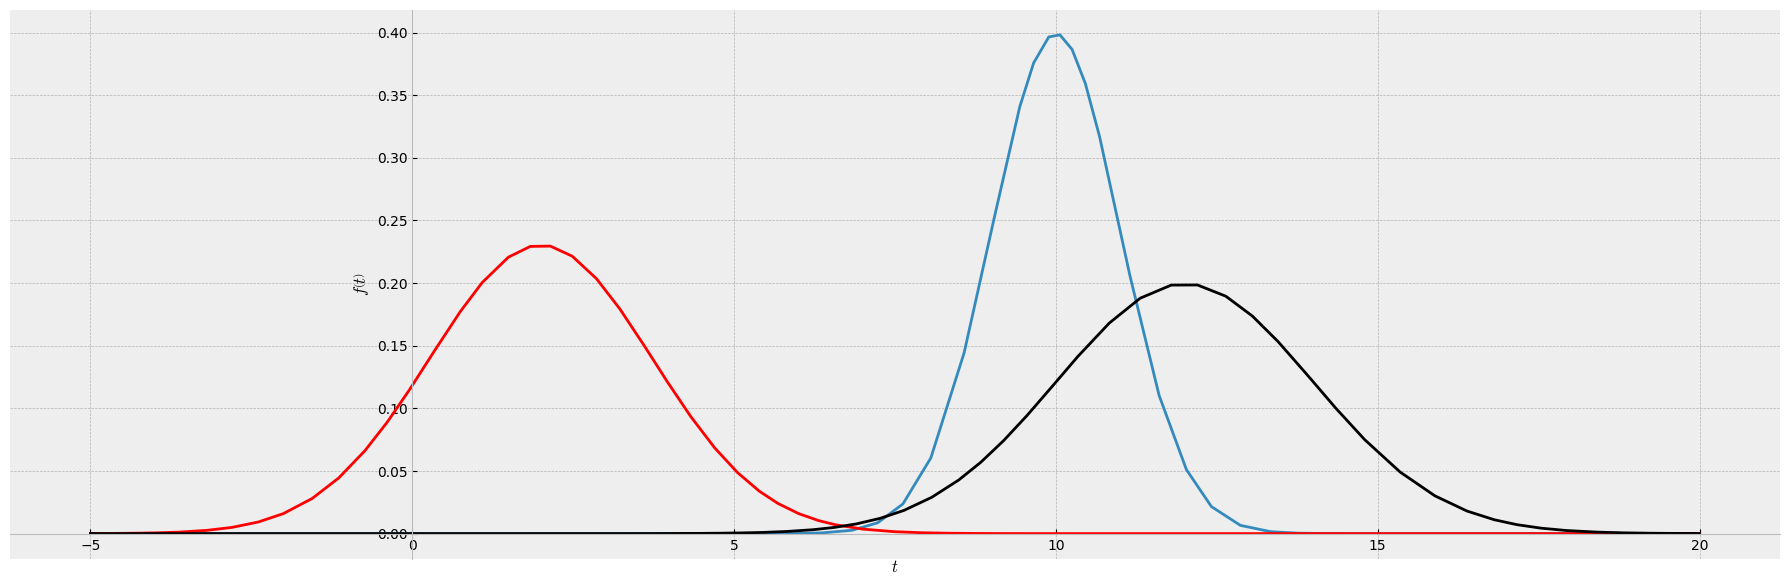

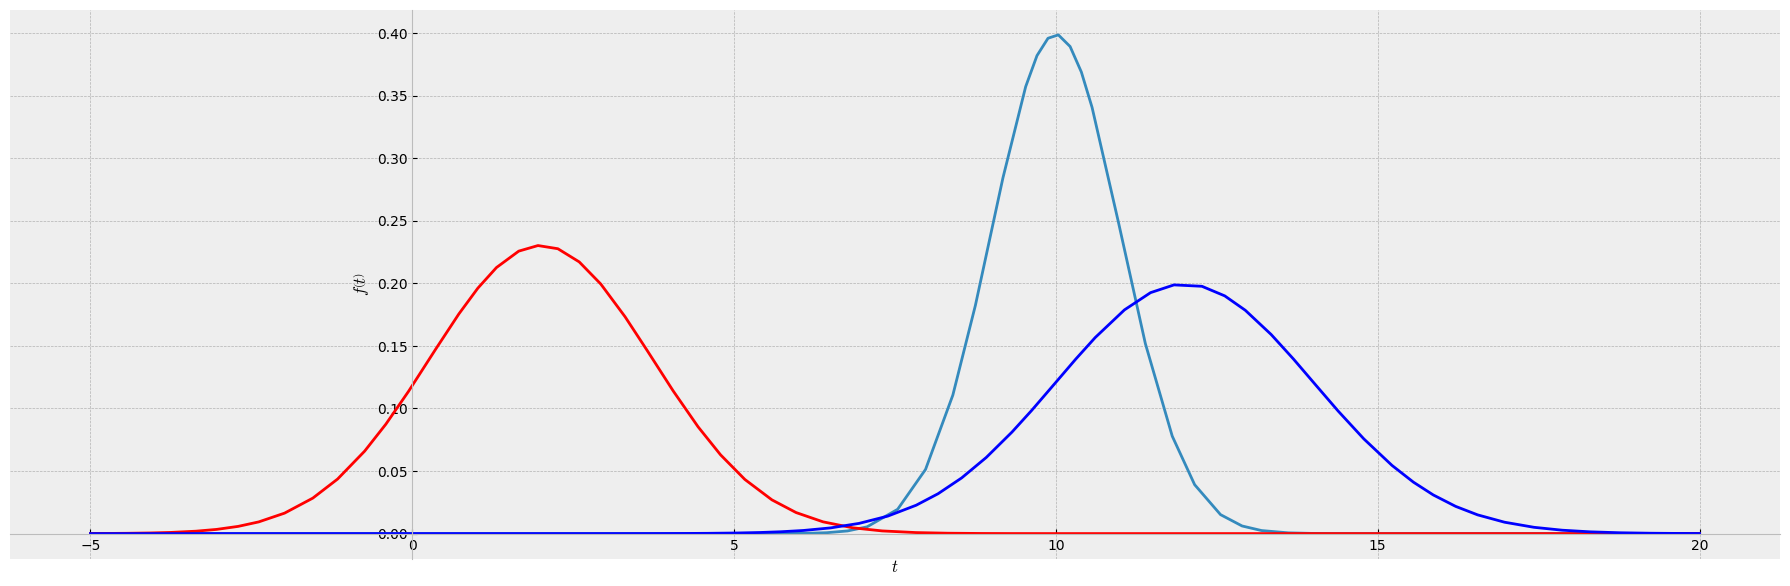

In [24]:
from sympy.stats import Normal, density, E, std, cdf

mu = sp.Symbol("mu")
muX = sp.Symbol("mu_X")
muY = sp.Symbol("m_Y")
muZ = sp.Symbol("mu_Z")
sigma = sp.Symbol("sigma", positive=True)
sigmaX = sp.Symbol("sigma_X", positive=True)
sigmaZ = sp.Symbol("sigma_Z", positive=True)
sigmaY = sp.Symbol("sigma_Y", positive=True)
t = sp.Symbol("t")
G = sp.stats.Normal("x", mu, sigma)
X = sp.stats.Normal("x", muX, sigmaX)
Y = sp.stats.Normal("y", muY, sigmaY)
Z = sp.stats.Normal("z", muZ, sigmaZ)

fx = density(X)(t)
fy = density(Y)(t)
fz = density(Z)(t)
fx_y = density(X+Y)(t)


#differences
aux_plot= sp.plot(fx.subs(sigmaX,1).subs(muX,10), fy.subs(sigmaY,sp.sqrt(3)).subs(muY,2), fx_y.subs(sigmaX,1).subs(muX,10).subs(sigmaY, sp.sqrt(3)).subs(muY, 2), (t, -5, 20), show=False);
aux_plot[1].line_color = 'r'
aux_plot[2].line_color = 'k'
aux_plot.show()
aux_plot= sp.plot(fx.subs(sigmaX,1).subs(muX,10), fy.subs(sigmaY,sp.sqrt(3)).subs(muY,2), fz.subs(sigmaZ,2).subs(muZ,12), (t, -5, 20), show=False);
aux_plot[1].line_color = 'r'
aux_plot[2].line_color = 'b'
aux_plot.show()

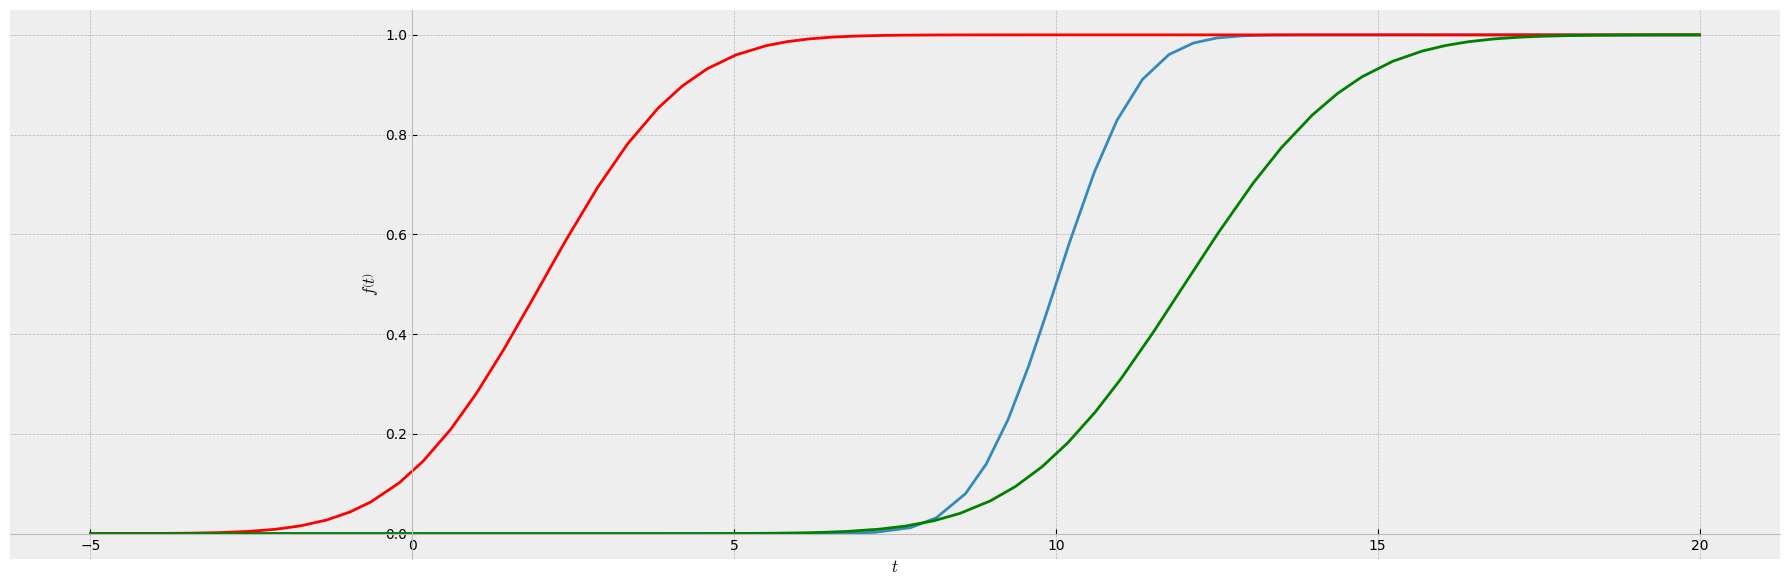

In [26]:
Cx = cdf(X)(t)
Cy = cdf(Y)(t)
Cz = cdf(Z)(t)

aux_plot= sp.plot(Cx.subs(sigmaX,1).subs(muX,10), Cy.subs(sigmaY,sp.sqrt(3)).subs(muY,2), Cz.subs(sigmaZ,2).subs(muZ,12), (t, -5, 20), show=False);
aux_plot[1].line_color = 'r'
aux_plot[2].line_color = 'g'
aux_plot.show()


The new random variable formed by the sum of two other random variables exhibits a higher mean, suggesting that the outcomes of variable Z are inclined towards a larger expected value compared to individual variables X and Y. As anticipated by theoretical considerations, this is visually evident in the probability density function (PDF) plots. 

The wider curve for Z reflects an increased variance, signifying a broader range of outcomes with non-negligible probabilities. The cumulative distribution function (CDF), being the integral of the PDF, reinforces this observation by displaying a gentler slope and delayed onset of growth. 

Examining the PDF plots for X, Y, and Z, the shift towards a greater mean and the increase in variance are clearly illustrated by the differences in curve shapes.